# Analysis of Covid in India

The following is an analysis on the affects of Corona virus in India:

**Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.**

**Symptoms**: Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

**Prevention**: The best way to prevent and slow down transmission is be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face. The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing into a flexed elbow). 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('complete.csv')

In [3]:
df

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-01-30,Kerala,1,0,0,10.8505,76.2711,0,1
1,2020-01-31,Kerala,1,0,0,10.8505,76.2711,0,1
2,2020-02-01,Kerala,2,0,0,10.8505,76.2711,0,2
3,2020-02-02,Kerala,3,0,0,10.8505,76.2711,0,3
4,2020-02-03,Kerala,3,0,0,10.8505,76.2711,0,3
...,...,...,...,...,...,...,...,...,...
1684,2020-05-07,Telengana,0,0,628,18.1124,79.0193,29,1107
1685,2020-05-07,Tripura,0,0,2,23.9408,91.9882,0,43
1686,2020-05-07,Uttar Pradesh,0,0,1130,26.8467,80.9462,60,2998
1687,2020-05-07,Uttarakhand,0,0,39,30.0668,79.0193,1,61


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df_datewise = pd.DataFrame({'Date' : df['Date'].unique()})

In [8]:
df_datewise

,Date
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03
...,...
94,2020-05-03
95,2020-05-04
96,2020-05-05
97,2020-05-06


In [9]:
def date_Confirmed(date):
    filt = (df['Date'] == date)
    return df[filt]['Total Confirmed cases'].sum()

In [10]:
df_datewise['Total Confirmed cases'] = df_datewise['Date'].apply(date_Confirmed)

In [11]:
def date_Deaths(date):
    filt = (df['Date'] == date)
    return df[filt]['Death'].sum()

In [12]:
df_datewise['Deaths'] = df_datewise['Date'].apply(date_Deaths)

In [13]:
def date_Recovered(date):
    filt = (df['Date'] == date)
    return df[filt]['Cured/Discharged/Migrated'].sum()

In [14]:
df_datewise['Cured/Discharged/Migrated'] = df_datewise['Date'].apply(date_Recovered)

In [15]:
df_datewise

,Date,Total Confirmed cases,Deaths,Cured/Discharged/Migrated
0,2020-01-30,1,0,0
1,2020-01-31,1,0,0
2,2020-02-01,2,0,0
3,2020-02-02,3,0,0
4,2020-02-03,3,0,0
...,...,...,...,...
94,2020-05-03,39856,1301,10633
95,2020-05-04,42533,1373,11707
96,2020-05-05,46433,1568,12727
97,2020-05-06,49391,1694,14183


# Increase in cases, deaths and cured/discharged/migrated from 30th January 2020 to 07th May 2020

The first case of covid-19 in India was reported on the 30th of January (30-01-2020), a student from Wuhan had returned back home and was later tested positive. The first case reported in the state of Kerala. Since the Country has seen a major rise in cases. The government took various measures to overcome this. Various lokdowns were imposed all around the country.

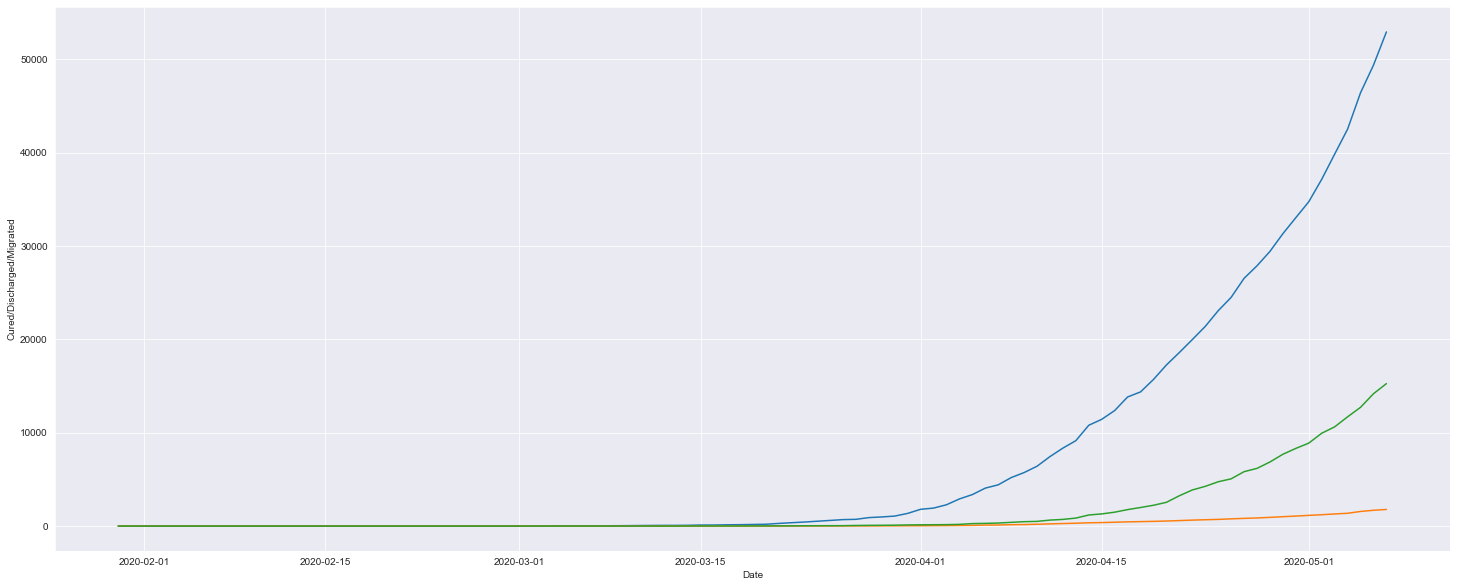

In [40]:
#df_datewise.iplot(x='Date', y=['Total Confirmed cases', 'Deaths', 'Cured/Discharged/Migrated'], kind='line')
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
sns.lineplot(x='Date', y='Total Confirmed cases', data=df_datewise)
sns.lineplot(x='Date', y='Deaths', data=df_datewise)
sns.lineplot(x='Date', y='Cured/Discharged/Migrated', data=df_datewise)

In [17]:
df_states = pd.DataFrame({'Name of State / UT' : df['Name of State / UT'].unique()})

In [18]:
def state_confirmed(state):
    filt = (df['Name of State / UT'] == state)
    return df[filt]['Total Confirmed cases'].max()

In [19]:
df_states['Confirmed'] = df_states['Name of State / UT'].apply(state_confirmed)

In [20]:
def state_deaths(state):
    filt = (df['Name of State / UT'] == state)
    return df[filt]['Death'].max()

In [21]:
df_states['Death'] = df_states['Name of State / UT'].apply(state_deaths)

In [22]:
def state_deaths(state):
    filt = (df['Name of State / UT'] == state)
    return df[filt]['Cured/Discharged/Migrated'].max()
df_states['Cured/Discharged/Migrated'] = df_states['Name of State / UT'].apply(state_deaths)

In [23]:
df_states

,Name of State / UT,Confirmed,Death,Cured/Discharged/Migrated
0,Kerala,503,4,469
1,Delhi,5532,65,1542
2,Telengana,1107,29,628
3,Haryana,594,7,260
4,Rajasthan,3317,92,1596
5,Uttar Pradesh,2998,60,1130
6,Tamil Nadu,4829,35,1516
7,Union Territory of Ladakh,10,0,0
8,Karnataka,693,29,354
9,Maharashtra,16758,651,3094


# State/UT wise distributions of Covid cases in India

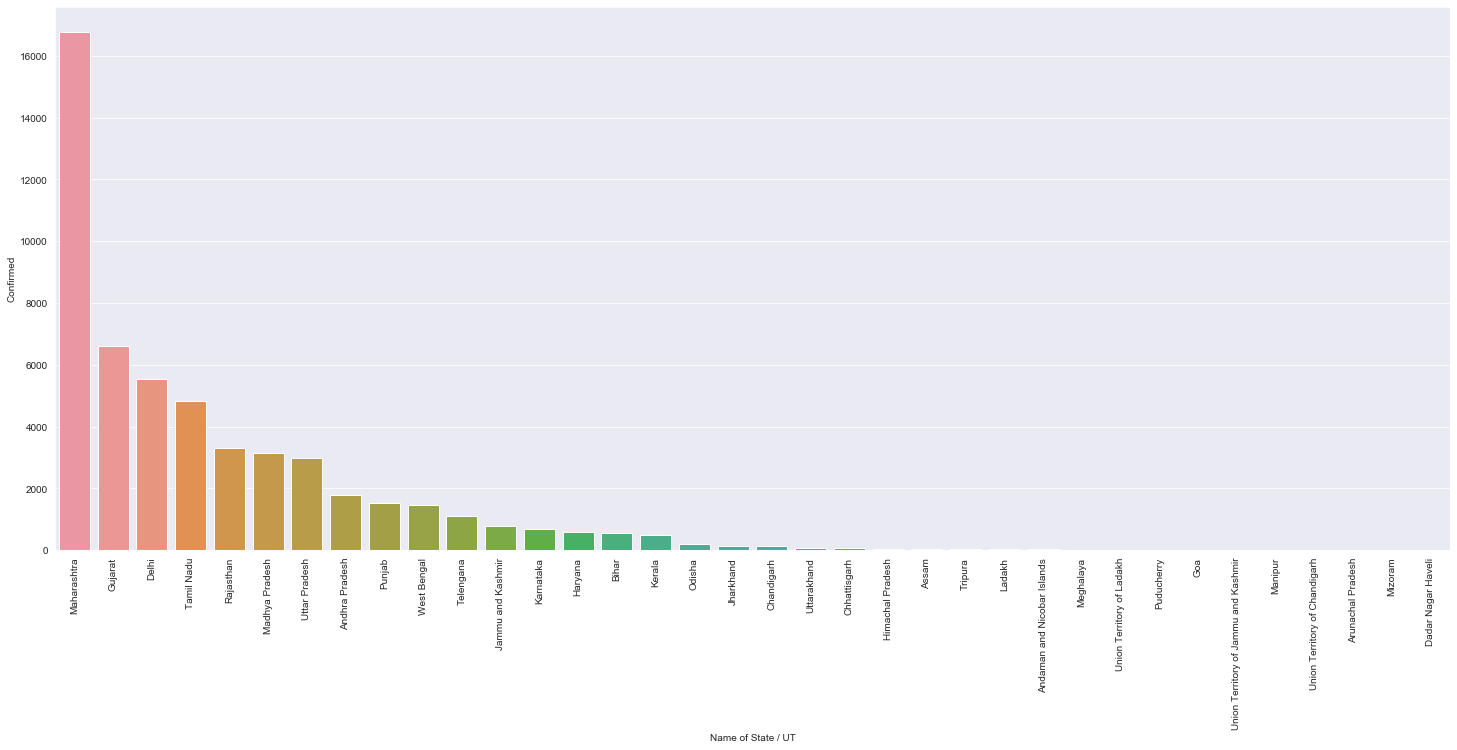

In [45]:
#df_states.sort_values('Confirmed', ascending=False).iplot(x='Name of State / UT', y='Confirmed', kind='bar')\
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.barplot(x='Name of State / UT', y='Confirmed', data=df_states.sort_values('Confirmed', ascending=False))

# State/UT wise distributions of Covid related deaths in India

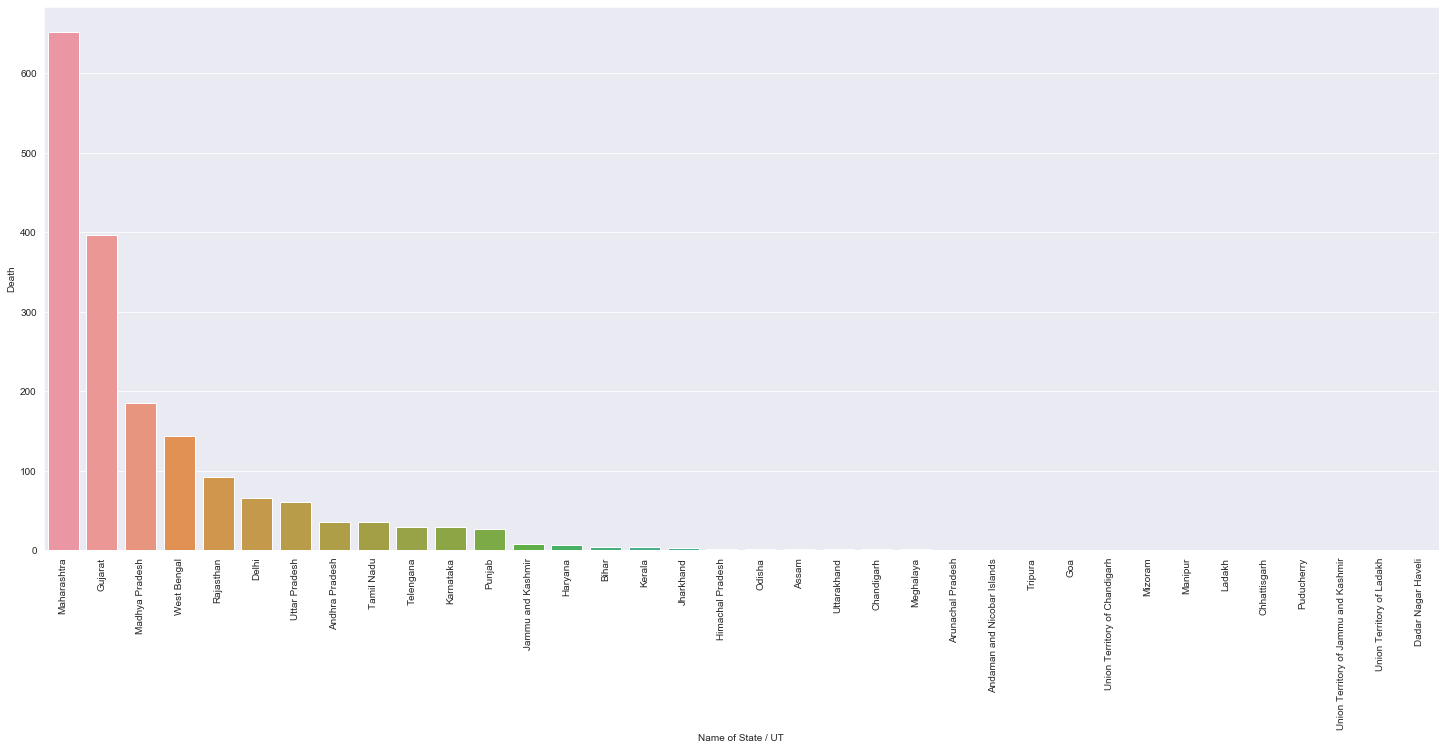

In [46]:
# df_states.sort_values('Death', ascending=False).iplot(x='Name of State / UT', y='Death', kind='bar')
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.barplot(x='Name of State / UT', y='Death', data=df_states.sort_values('Death', ascending=False))

# State/UT wise distributions of Cured/Discharged/Migrated in India

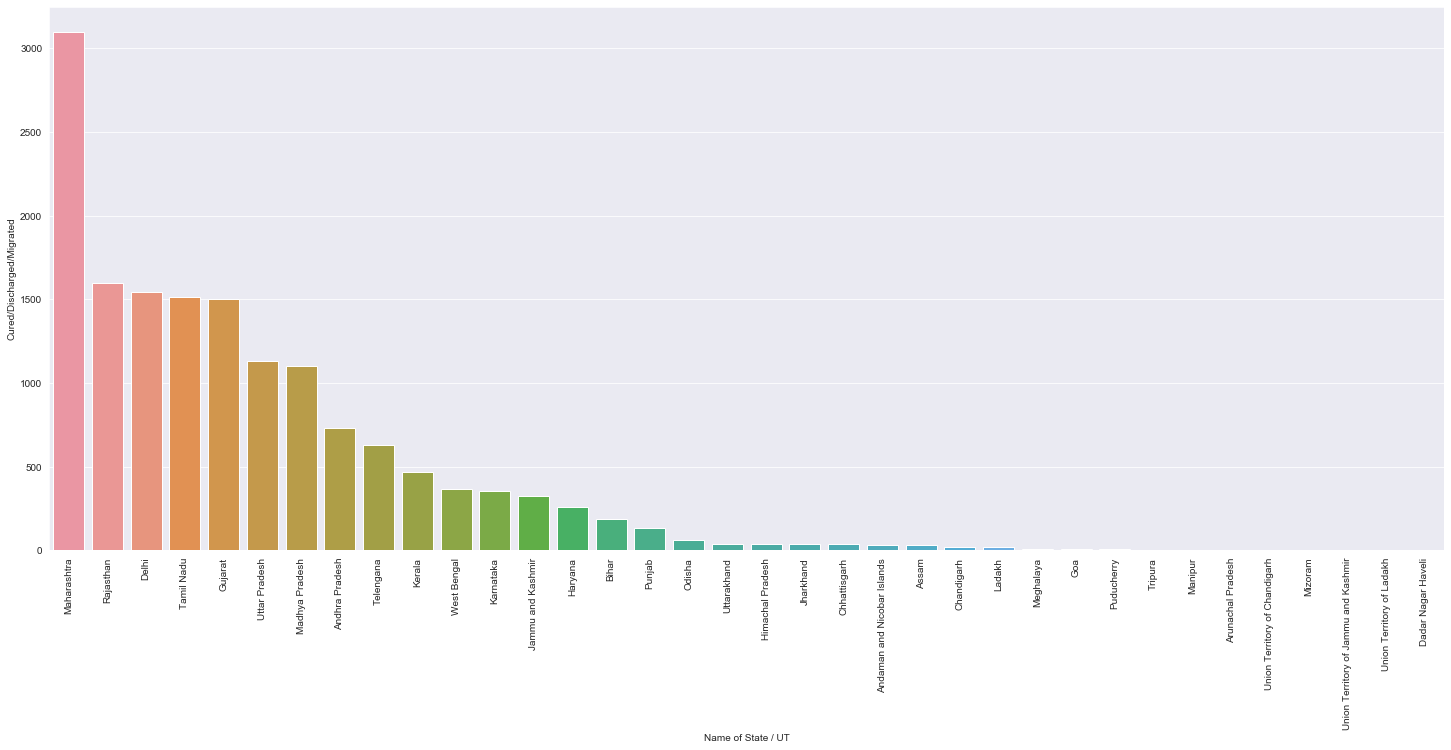

In [47]:
# df_states.sort_values('Cured/Discharged/Migrated', ascending=False).iplot(x='Name of State / UT', y='Cured/Discharged/Migrated', kind='bar')
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.barplot(x='Name of State / UT', y='Cured/Discharged/Migrated', data=df_states.sort_values('Cured/Discharged/Migrated', ascending=False))

In [27]:
l = []
l.append(df_datewise['Total Confirmed cases'].iloc[0])
for i in range(1, 99):
    l.append(df_datewise['Total Confirmed cases'].iloc[i] - df_datewise['Total Confirmed cases'].iloc[i-1])
df_datewise['Daily Reported Cases'] = l

l = []
l.append(df_datewise['Deaths'].iloc[0])
for i in range(1, 99):
    l.append(df_datewise['Deaths'].iloc[i] - df_datewise['Deaths'].iloc[i-1])
df_datewise['Daily Reported deaths'] = l

l = []
l.append(df_datewise['Cured/Discharged/Migrated'].iloc[0])
for i in range(1, 99):
    l.append(df_datewise['Cured/Discharged/Migrated'].iloc[i] - df_datewise['Cured/Discharged/Migrated'].iloc[i-1])
df_datewise['Daily Reported CDM'] = l

In [28]:
df_datewise

,Date,Total Confirmed cases,Deaths,Cured/Discharged/Migrated,Daily Reported Cases,Daily Reported deaths,Daily Reported CDM
0,2020-01-30,1,0,0,1,0,0
1,2020-01-31,1,0,0,0,0,0
2,2020-02-01,2,0,0,1,0,0
3,2020-02-02,3,0,0,1,0,0
4,2020-02-03,3,0,0,0,0,0
...,...,...,...,...,...,...,...
94,2020-05-03,39856,1301,10633,2699,83,682
95,2020-05-04,42533,1373,11707,2677,72,1074
96,2020-05-05,46433,1568,12727,3900,195,1020
97,2020-05-06,49391,1694,14183,2958,126,1456


# Daily distributions of Covid cases in India from 30th January 2020 to 07th May 2020

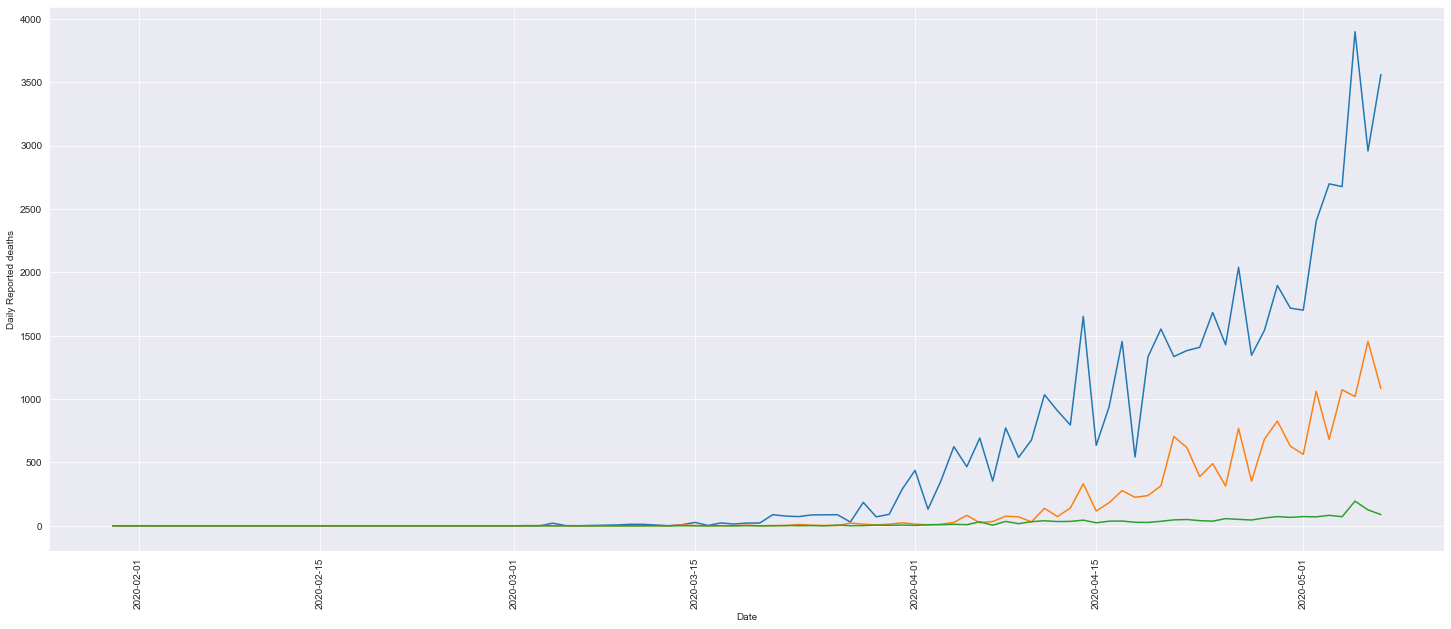

In [51]:
# df_datewise.iplot(x='Date', y=['Daily Reported deaths', 'Daily Reported CDM', 'Daily Reported Cases'], kind='line')
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.lineplot(x='Date', y='Daily Reported Cases', data=df_datewise)
sns.lineplot(x='Date', y='Daily Reported CDM', data=df_datewise)
sns.lineplot(x='Date', y='Daily Reported deaths', data=df_datewise)

In [31]:
df_after_lockdown_phase1 = df_datewise.set_index('Date').loc['2020-03-25':'2020-04-14']
df_after_lockdown_phase1

,Total Confirmed cases,Deaths,Cured/Discharged/Migrated,Daily Reported Cases,Daily Reported deaths,Daily Reported CDM
Date,,,,,,
2020-03-25,606,10,43,87,0,3
2020-03-26,694,16,45,88,6,2
2020-03-27,724,17,67,30,1,22
2020-03-28,909,19,80,185,2,13
2020-03-29,980,25,87,71,6,7
2020-03-30,1071,29,100,91,4,13
2020-03-31,1359,35,124,288,6,24
2020-04-01,1797,38,138,438,3,14
2020-04-02,1928,47,145,131,9,7


In [32]:
df_after_lockdown_phase2 = df_datewise.set_index('Date').loc['2020-04-15':'2020-05-03']

In [33]:
df_after_lockdown_phase2

,Total Confirmed cases,Deaths,Cured/Discharged/Migrated,Daily Reported Cases,Daily Reported deaths,Daily Reported CDM
Date,,,,,,
2020-04-15,11439,377,1306,635,24,117
2020-04-16,12380,414,1489,941,37,183
2020-04-17,13835,452,1767,1455,38,278
2020-04-18,14378,480,1992,543,28,225
2020-04-19,15712,507,2231,1334,27,239
2020-04-20,17265,543,2547,1553,36,316
2020-04-21,18601,590,3252,1336,47,705
2020-04-22,19984,640,3870,1383,50,618
2020-04-23,21393,681,4258,1409,41,388


In [34]:
df.head()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-01-30,Kerala,1,0,0,10.8505,76.2711,0,1
1,2020-01-31,Kerala,1,0,0,10.8505,76.2711,0,1
2,2020-02-01,Kerala,2,0,0,10.8505,76.2711,0,2
3,2020-02-02,Kerala,3,0,0,10.8505,76.2711,0,3
4,2020-02-03,Kerala,3,0,0,10.8505,76.2711,0,3


# Lockdown-1 (25-03-2020 to 14-04-2020)

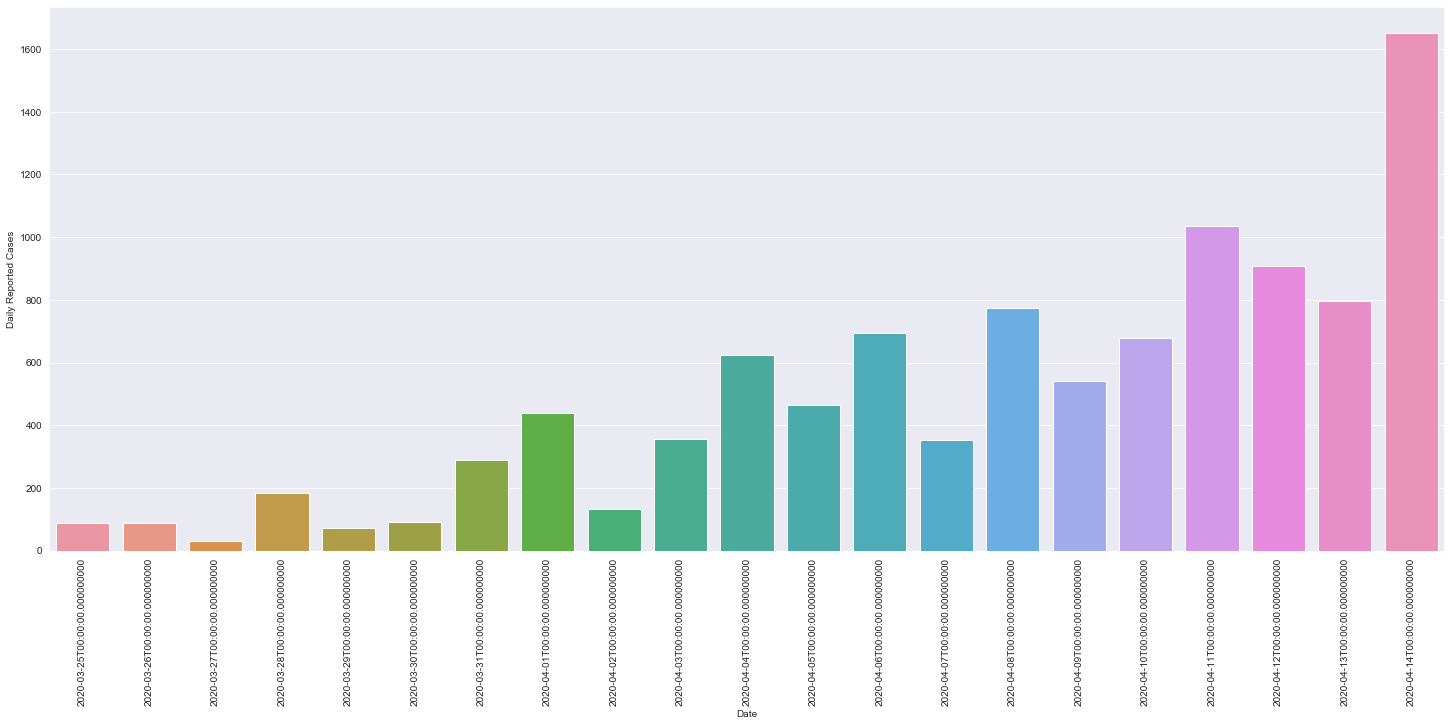

In [52]:
# df_after_lockdown_phase1.reset_index().iplot(x='Date', y=['Daily Reported Cases'], kind='bar')
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.barplot(x='Date', y='Daily Reported Cases', data=df_after_lockdown_phase1.reset_index())

# Lockdown-2 (15-04-2020 to 03-05-2020)

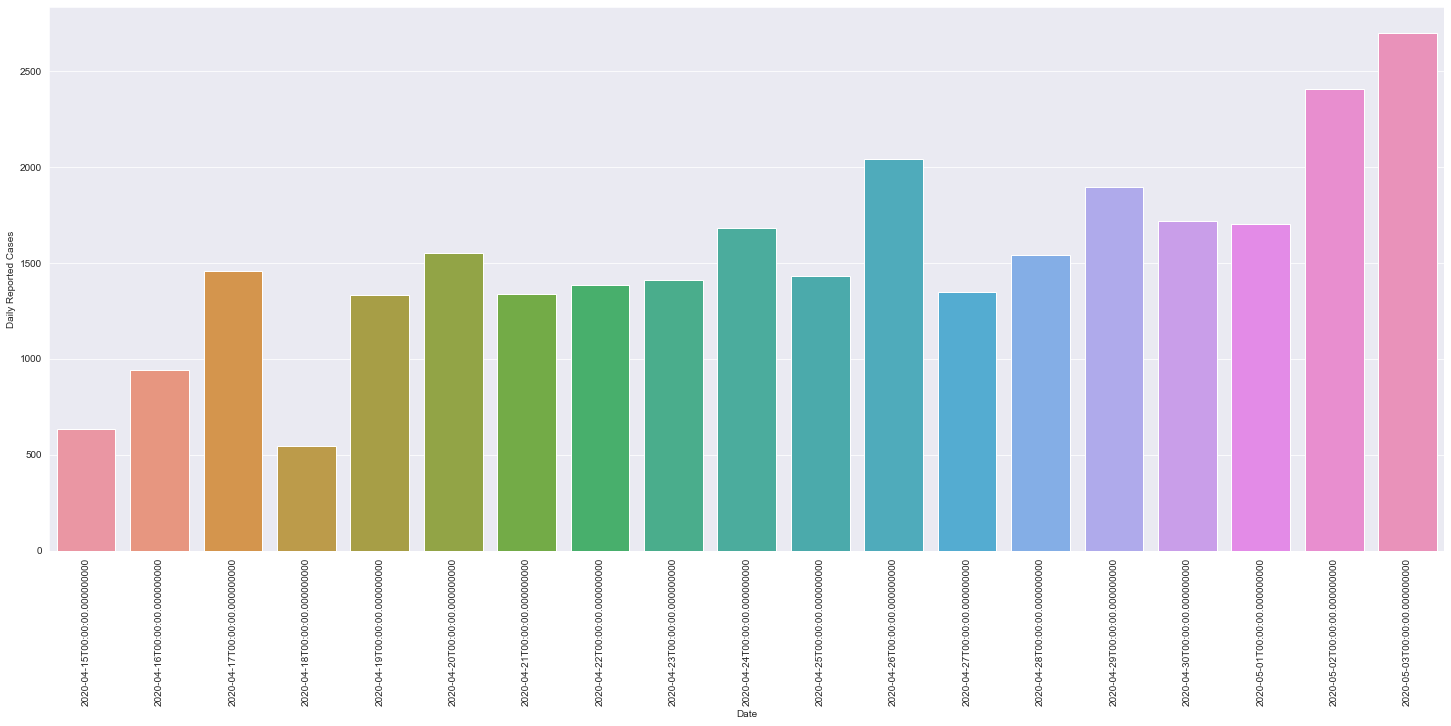

In [53]:
# df_after_lockdown_phase2.reset_index().iplot(x='Date', y=['Daily Reported Cases'], kind='bar')
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.barplot(x='Date', y='Daily Reported Cases', data=df_after_lockdown_phase2.reset_index())

# Analysis results

**Lockdowns:** 
1. Lockdown-1 (25.03.2020 to 14.04.2020): The first lockdown was of a time span of 21 days. 
    - 10285 cases were reported
    - 343 deaths were witnessed
    - 1149 were discharged/migrated/cured

2. Lockdown-2 (15.04.2020 to 03.05.2020): The second lockdown was of 16 days.
    - 29052 cases were reported
    - 948 deaths were witnessed
    - 9444 were discharged/migrated/cured 

At the end of the second lockdown a total of: 39856 cases, 1301 deaths, 10633 cured/migrated/dischared were reported.

# Cases before the lockdown

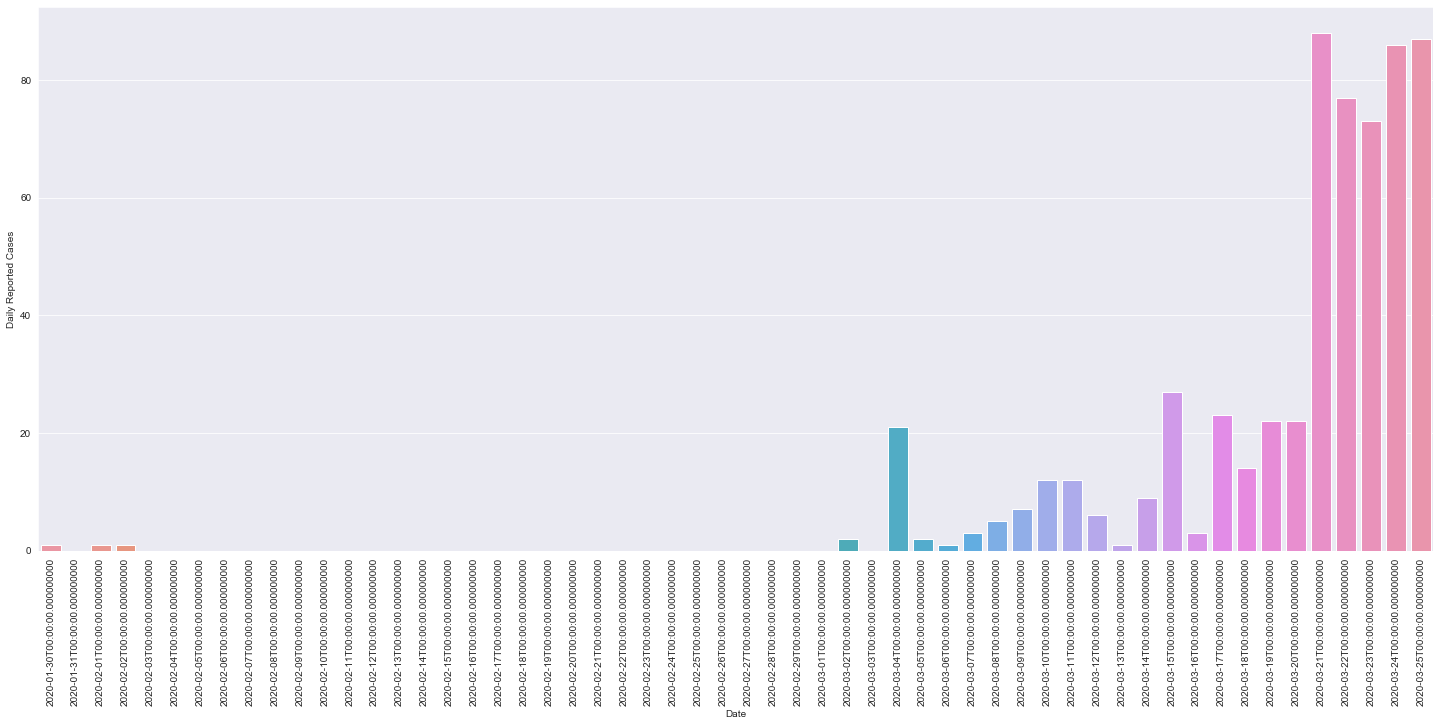

In [54]:
# df_datewise.set_index('Date').loc['2020-01-30':'2020-03-25'].reset_index().iplot(x='Date', y=['Daily Reported Cases'], kind='bar')
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.barplot(x='Date', y='Daily Reported Cases', data=df_datewise.set_index('Date').loc['2020-01-30':'2020-03-25'].reset_index())

# Total number cases, deaths and recoveries reported in the timeline of Covid


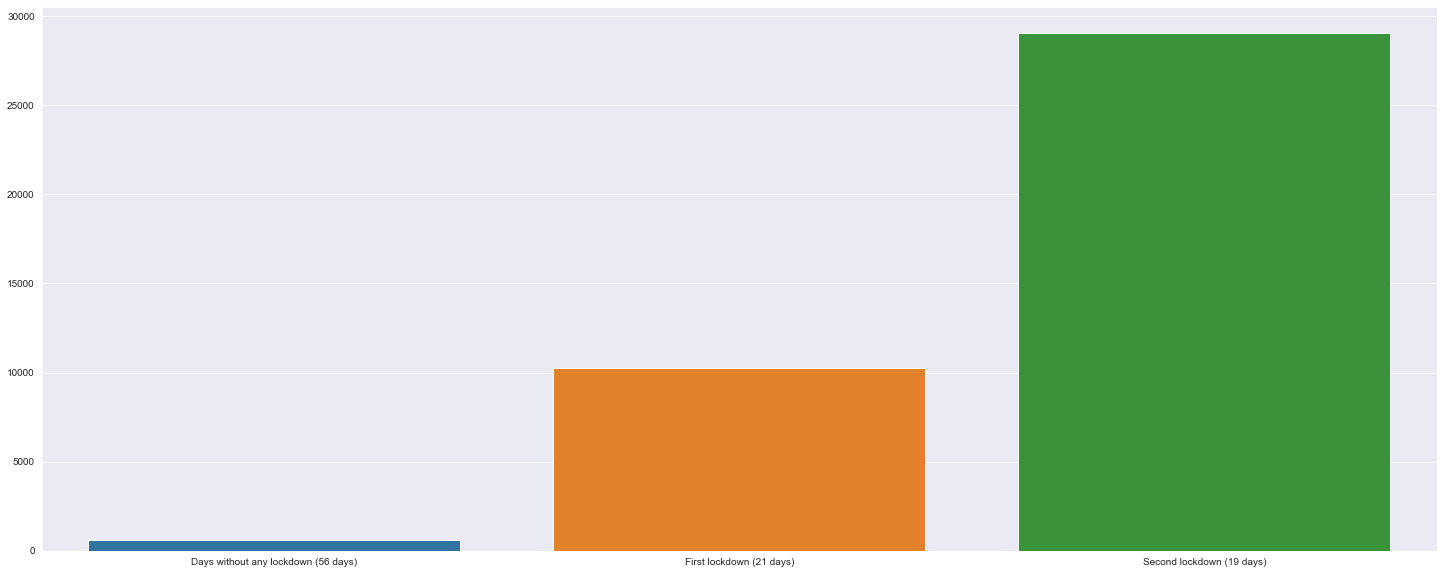

In [62]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
sns.barplot(x=['Days without any lockdown (56 days)', 'First lockdown (21 days)', 'Second lockdown (19 days)'], y=[df_datewise.set_index('Date').loc['2020-01-30':'2020-03-25']['Daily Reported Cases'].sum(), df_after_lockdown_phase1['Daily Reported Cases'].sum(), df_after_lockdown_phase2['Daily Reported Cases'].sum()])

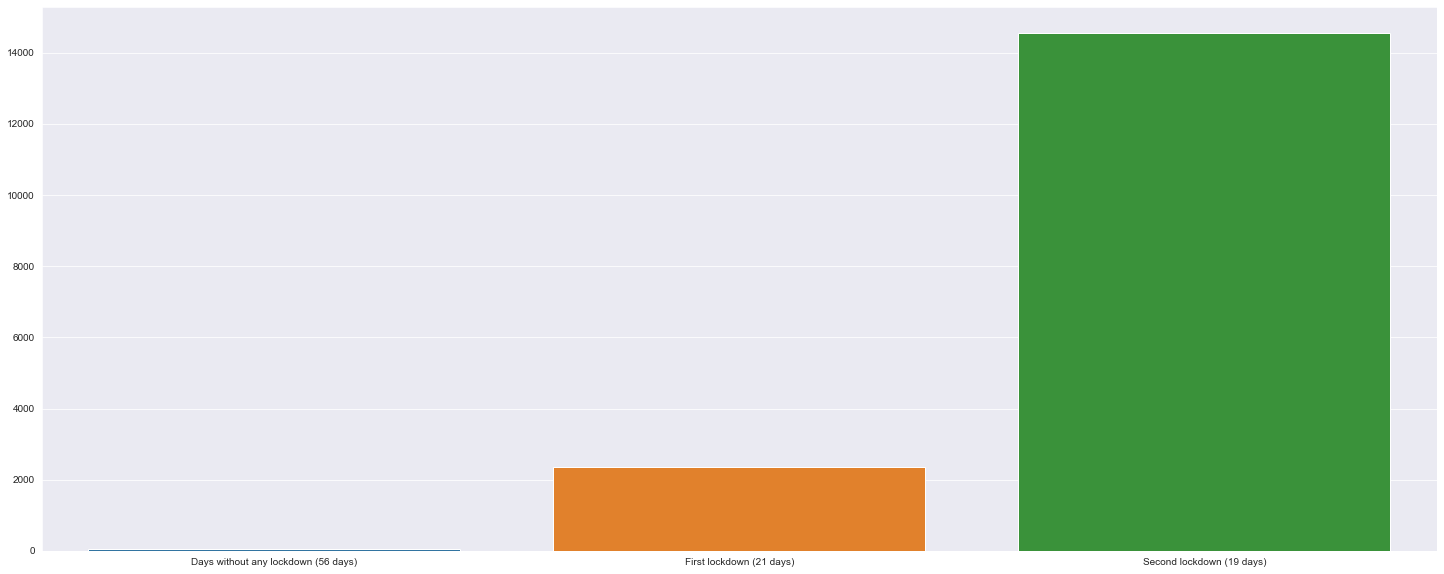

In [65]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
sns.barplot(x=['Days without any lockdown (56 days)', 'First lockdown (21 days)', 'Second lockdown (19 days)'], y=[df_datewise.set_index('Date').loc['2020-01-30':'2020-03-25']['Deaths'].sum(), df_after_lockdown_phase1['Deaths'].sum(), df_after_lockdown_phase2['Deaths'].sum()])

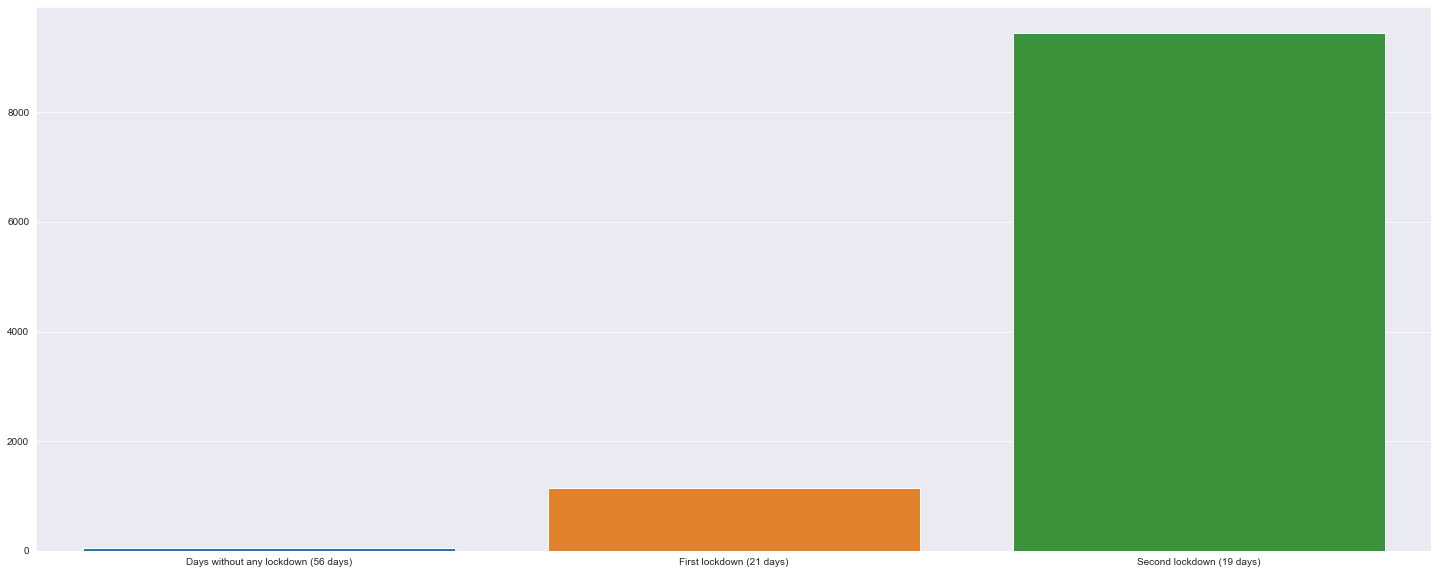

In [72]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
sns.barplot(x=['Days without any lockdown (56 days)', 'First lockdown (21 days)', 'Second lockdown (19 days)'], y=[df_datewise.set_index('Date').loc['2020-01-30':'2020-03-25']['Daily Reported CDM'].sum(), df_after_lockdown_phase1['Daily Reported CDM'].sum(), df_after_lockdown_phase2['Daily Reported CDM'].sum()])

# Results:

The expection of the lockdown was to reduce the number of cases or the spread, but in turn the spread increased. This isn't a complete blame on the lockdown. There are various factors to this: 

1. Testing: As of 30-04-2020, India had tested 9,15,735 samples. Testing does play a role in this increase in cases. As more the tests are done, more cases are discovered. 
2. Improper implementation: The government did impose a lockdown, but the implementation was late and wasn't accepted well by the public. The first lockdown was implemented after 56 days of the first case. The public wasn't equally aware of the outbreak. There various events that went on happening. There were number of large public gatherings happening that could have played vital roles in the spread of the virus. A few of the events that happened are mentioned below:

Event List:
    1. Delhi elections - 8th feb
    2. Delhi riots -     24-29 feb
    3. Namaste trump -   24-25 feb

Luckily there weren't any cases reported during these events. Even if a single person would have tested positive during any of these events, the results could of been catastrophic.

Not only these events, but the public is to be held equally responsible. Even after the lockdown was implemented, the were n number places were people were planning trips, incidents of panic buying were seen, events of celebration were seen. The case of many religious gatherings were also seen, for ex: tabligi jamaat, majnu ka tila gurudwara were a number of cases were reported. They considered the hotspots. 

Stats: 
    1. First case:       '2020-01-30'
    2. 100 crossing:     '2020-03-14'
    3. 1000 crossing:    '2020-03-30'
    4. 10000 crossing:   '2020-04-14'

Currently the country is under a 3rd lockdown which started on the 4th May and will go upto 17th May. The central govt is planning on bringing a 4th lockdown after 17th of May. Various relaxations are being planned. In the 3rd lockdown the govt had decided to divde the States / Union Territories into 3 zones:
    1. Green zone  
    2. Orange zone  
    3. Red zone 